In [ ]:
import numpy as np
import pandas as pd
import pickle
import glob, os
import matplotlib.pyplot as plt
import gzip
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Loading dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
X_train.shape

(50000, 32, 32, 3)

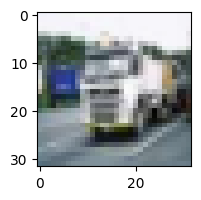

In [ ]:
image = X_train[1000]#.reshape(32, 32, 3) # Reshape the flattened image into 32x32x3 shape
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.show()

Preprocessing dataset

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Normalization

X_train /= 255
X_test /= 255

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

Baseline Model

In [ ]:
inp_shape = (32, 32, 3)
num_cls = 10

model = keras.Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inp_shape))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(rate=0.2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(num_cls, activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                   

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1250/1250 - 18s - loss: 1.6249 - accuracy: 0.4064 - val_loss: 1.4300 - val_accuracy: 0.4794 - 18s/epoch - 14ms/step
Epoch 2/10
1250/1250 - 6s - loss: 1.2963 - accuracy: 0.5355 - val_loss: 1.2276 - val_accuracy: 0.5635 - 6s/epoch - 5ms/step
Epoch 3/10
1250/1250 - 6s - loss: 1.1239 - accuracy: 0.6026 - val_loss: 1.0828 - val_accuracy: 0.6224 - 6s/epoch - 5ms/step
Epoch 4/10
1250/1250 - 5s - loss: 1.0144 - accuracy: 0.6418 - val_loss: 1.0420 - val_accuracy: 0.6304 - 5s/epoch - 4ms/step
Epoch 5/10
1250/1250 - 6s - loss: 0.9483 - accuracy: 0.6678 - val_loss: 0.9582 - val_accuracy: 0.6626 - 6s/epoch - 5ms/step
Epoch 6/10
1250/1250 - 5s - loss: 0.8910 - accuracy: 0.6892 - val_loss: 0.9261 - val_accuracy: 0.6790 - 5s/epoch - 4ms/step
Epoch 7/10
1250/1250 - 7s - loss: 0.8377 - accuracy: 0.7048 - val_loss: 0.9355 - val_accuracy: 0.6713 - 7s/epoch - 6ms/step
Epoch 8/10
1250/1250 - 6s - loss: 0.8014 - accuracy: 0.7194 - val_loss: 0.9985 - val_accuracy: 0.6625 - 6s/epoch - 5ms/step
Epoch

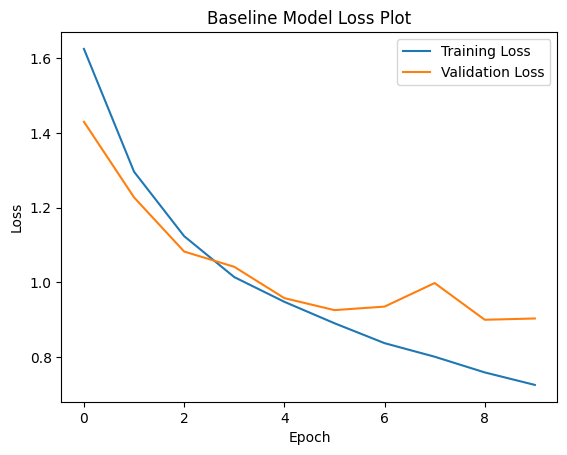

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Baseline Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

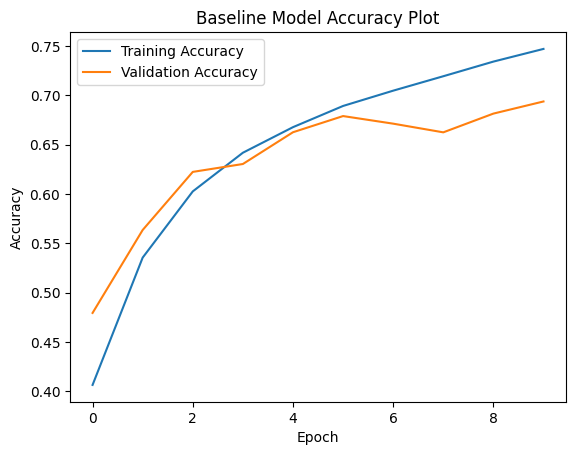

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9201 - accuracy: 0.6908


In [ ]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.9200500845909119
Test Accuracy: 0.6908000111579895


Model2 - with Dropout()

In [ ]:
model_2 = keras.Sequential()
model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inp_shape))
model_2.add(Conv2D(16, 3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(rate=0.2))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(rate=0.2))
model_2.add(Flatten())
model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=0.2))
model_2.add(Dense(num_cls, activation='softmax'))

In [ ]:
model_2.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        9248      
                                                      

In [ ]:
history_2 = model_2.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1250/1250 - 10s - loss: 1.6788 - accuracy: 0.3821 - val_loss: 1.3723 - val_accuracy: 0.5118 - 10s/epoch - 8ms/step
Epoch 2/10
1250/1250 - 7s - loss: 1.3790 - accuracy: 0.5015 - val_loss: 1.1912 - val_accuracy: 0.5800 - 7s/epoch - 5ms/step
Epoch 3/10
1250/1250 - 7s - loss: 1.2452 - accuracy: 0.5549 - val_loss: 1.1208 - val_accuracy: 0.6081 - 7s/epoch - 5ms/step
Epoch 4/10
1250/1250 - 6s - loss: 1.1573 - accuracy: 0.5874 - val_loss: 1.1325 - val_accuracy: 0.6033 - 6s/epoch - 5ms/step
Epoch 5/10
1250/1250 - 7s - loss: 1.0925 - accuracy: 0.6116 - val_loss: 1.0012 - val_accuracy: 0.6498 - 7s/epoch - 5ms/step
Epoch 6/10
1250/1250 - 8s - loss: 1.0453 - accuracy: 0.6281 - val_loss: 0.9504 - val_accuracy: 0.6581 - 8s/epoch - 6ms/step
Epoch 7/10
1250/1250 - 9s - loss: 0.9993 - accuracy: 0.6442 - val_loss: 0.9639 - val_accuracy: 0.6639 - 9s/epoch - 7ms/step
Epoch 8/10
1250/1250 - 6s - loss: 0.9749 - accuracy: 0.6559 - val_loss: 0.8963 - val_accuracy: 0.6853 - 6s/epoch - 5ms/step
Epoch 

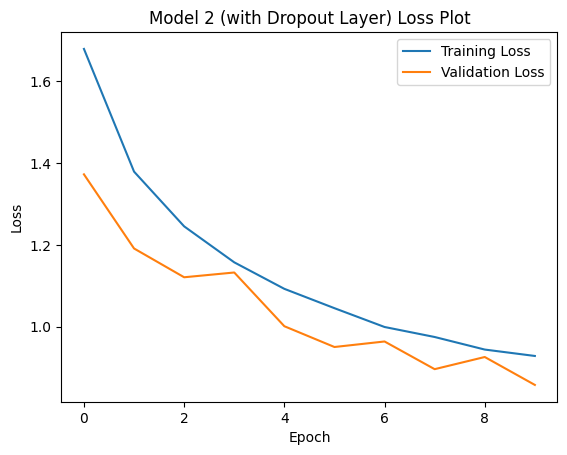

In [ ]:
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 (with Dropout Layer) Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

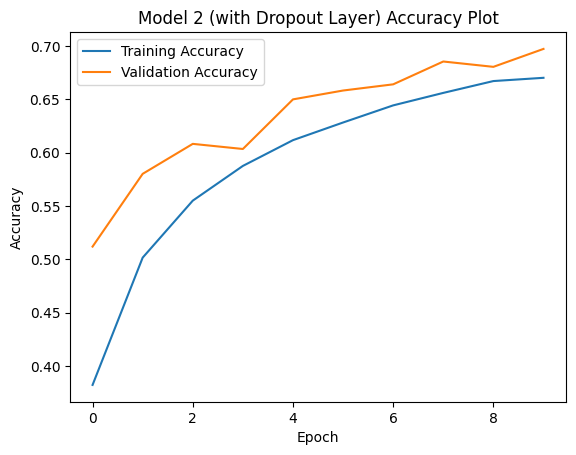

In [ ]:
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (with Dropout Layer) Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8876 - accuracy: 0.6900


In [ ]:
print(f"Test Loss: {test_loss_2}")
print(f"Test Accuracy: {test_accuracy_2}")

Test Loss: 0.8875821232795715
Test Accuracy: 0.6899999976158142


Hyperparameter tuning for the model (with dropout layer)

In [ ]:
def build_model_3(hp):

  model_3 = keras.Sequential()
  model_3.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inp_shape))
  model_3.add(Conv2D(16, 3, activation='relu'))
  model_3.add(MaxPooling2D(pool_size=hp.Choice('pool_size_1',values=[2, 4],default=2)))
  model_3.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.6,default=0.2,step=0.2,)))
  model_3.add(Conv2D(32, 3, activation='relu'))
  model_3.add(Conv2D(filters=hp.Choice('num_filters',values=[32, 64],default=32),activation='relu',kernel_size=3))
  model_3.add(MaxPooling2D(pool_size=hp.Choice('pool_size_2',values=[2, 4],default=2)))
  model_3.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.6,default=0.2,step=0.2,)))
  model_3.add(Flatten())
  model_3.add(Dense(units=hp.Int('units',min_value=64,max_value=256,step=64,default=64),
                activation=hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],default='relu')))
  model_3.add(Dropout(rate=hp.Float('dropout_3',min_value=0.0,max_value=0.6,default=0.2,step=0.2,)))
  model_3.add(Dense(num_cls, activation='softmax'))

  model_3.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='LOG',default=1e-3)),
                  loss='categorical_crossentropy',metrics=['accuracy'])

  return model_3

In [ ]:
import keras_tuner as kt
import tensorflow as tf

In [ ]:
tuner = kt.Hyperband(build_model_3, objective='val_accuracy', max_epochs=10, seed=13, directory='hyperband',project_name='cis519_cv_milestone3')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
pool_size_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 4], 'ordered': True}
dropout_1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.0, 'max_value': 0.6, 'step': 0.2, 'sampling': 'linear'}
num_filters (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}
pool_size_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 4], 'ordered': True}
dropout_2 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.0, 'max_value': 0.6, 'step': 0.2, 'sampling': 'linear'}
units (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.0, 'max_value': 0.6, 'step': 0.2, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 

In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)])

Trial 28 Complete [00h 01m 19s]
val_accuracy: 0.6442000269889832

Best val_accuracy So Far: 0.7132999897003174
Total elapsed time: 00h 19m 43s


In [ ]:
tuner.results_summary()

Results summary
Results in hyperband/cis519_cv_milestone3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0015 summary
Hyperparameters:
pool_size_1: 2
dropout_1: 0.2
num_filters: 64
pool_size_2: 2
dropout_2: 0.2
units: 128
dense_activation: sigmoid
dropout_3: 0.2
learning_rate: 0.0012482904754698163
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.7132999897003174

Trial 0022 summary
Hyperparameters:
pool_size_1: 2
dropout_1: 0.0
num_filters: 64
pool_size_2: 4
dropout_2: 0.4
units: 256
dense_activation: relu
dropout_3: 0.2
learning_rate: 0.0009452767099282696
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.6761999726295471

Trial 0025 summary
Hyperparameters:
pool_size_1: 2
dropout_1: 0.4
num_filters: 32
pool_size_2: 2
dropout_2: 0.4
units: 128
dense_activation: relu
dropout_3: 0.4
learning_rate: 0.0005580490517344697
tuner/epochs: 10
tuner/initial_ep

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters()[0]

In [ ]:
hp_model = tuner.hypermodel.build(best_hp)
hp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [ ]:
test_loss_hp, test_accuracy_hp = best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8587 - accuracy: 0.7001


In [ ]:
print(f"Test Loss: {test_loss_hp}")
print(f"Test Accuracy: {test_accuracy_hp}")

Test Loss: 0.8586753010749817
Test Accuracy: 0.7001000046730042


Retraining model using the best parameters (to get the loss & accuracy plot)

In [ ]:
history_hp = hp_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.2)
#history_hp = best_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1250/1250 - 9s - loss: 1.6150 - accuracy: 0.4068 - val_loss: 1.3220 - val_accuracy: 0.5225 - 9s/epoch - 7ms/step
Epoch 2/10
1250/1250 - 6s - loss: 1.2711 - accuracy: 0.5462 - val_loss: 1.1969 - val_accuracy: 0.5722 - 6s/epoch - 5ms/step
Epoch 3/10
1250/1250 - 8s - loss: 1.1230 - accuracy: 0.6044 - val_loss: 0.9864 - val_accuracy: 0.6525 - 8s/epoch - 6ms/step
Epoch 4/10
1250/1250 - 6s - loss: 1.0260 - accuracy: 0.6382 - val_loss: 0.9490 - val_accuracy: 0.6637 - 6s/epoch - 5ms/step
Epoch 5/10
1250/1250 - 7s - loss: 0.9659 - accuracy: 0.6598 - val_loss: 0.8993 - val_accuracy: 0.6858 - 7s/epoch - 6ms/step
Epoch 6/10
1250/1250 - 6s - loss: 0.9055 - accuracy: 0.6846 - val_loss: 0.9139 - val_accuracy: 0.6829 - 6s/epoch - 5ms/step
Epoch 7/10
1250/1250 - 7s - loss: 0.8670 - accuracy: 0.6965 - val_loss: 0.8330 - val_accuracy: 0.7056 - 7s/epoch - 5ms/step
Epoch 8/10
1250/1250 - 6s - loss: 0.8287 - accuracy: 0.7092 - val_loss: 0.8302 - val_accuracy: 0.7087 - 6s/epoch - 5ms/step
Epoch 9/

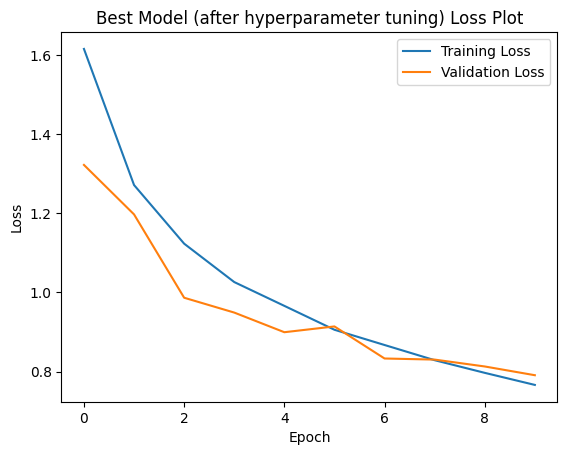

In [ ]:
plt.plot(history_hp.history['loss'], label='Training Loss')
plt.plot(history_hp.history['val_loss'], label='Validation Loss')
plt.title('Best Model (after hyperparameter tuning) Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

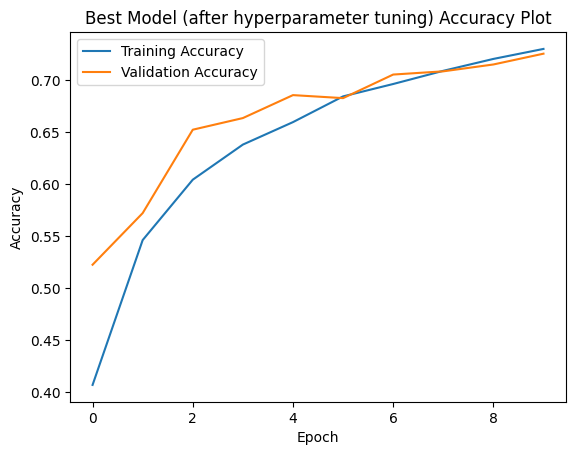

In [ ]:
plt.plot(history_hp.history['accuracy'], label='Training Accuracy')
plt.plot(history_hp.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best Model (after hyperparameter tuning) Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss_hp2, test_accuracy_hp2 = hp_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8049 - accuracy: 0.7163


In [ ]:
print(f"Test Loss: {test_loss_hp2}")
print(f"Test Accuracy: {test_accuracy_hp2}")

Test Loss: 0.804887056350708
Test Accuracy: 0.7163000106811523


Datashift experiment

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.1
    )

In [ ]:
test_generator = datagen.flow(X_test, y_test, batch_size=32)

In [ ]:
test_loss_datashift, test_accuracy_datashift = hp_model.evaluate(test_generator)

313/313 [==============================] - 7s 20ms/step - loss: 1.9166 - accuracy: 0.4057


In [ ]:
print(f"Test Loss: {test_loss_datashift}")
print(f"Test Accuracy: {test_accuracy_datashift}")

Test Loss: 1.9165700674057007
Test Accuracy: 0.4056999981403351


Datashift Model

In [ ]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.05
    )

In [ ]:
val_datagen = ImageDataGenerator()

In [ ]:
data_len = int(0.8*(X_train.shape[0]))

train_generator = train_datagen.flow(X_train[:data_len], y_train[:data_len], batch_size=32)
val_generator = val_datagen.flow(X_train[data_len:], y_train[data_len:], batch_size=32)

In [ ]:
hp_datashift_model = tuner.hypermodel.build(best_hp)
hp_datashift_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        18496     
                                                      

In [ ]:
history_datashift_hp = hp_datashift_model.fit(train_generator, validation_data=val_generator, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1250/1250 - 39s - loss: 1.8561 - accuracy: 0.3042 - val_loss: 1.5738 - val_accuracy: 0.4234 - 39s/epoch - 31ms/step
Epoch 2/10
1250/1250 - 31s - loss: 1.5866 - accuracy: 0.4151 - val_loss: 1.4023 - val_accuracy: 0.4726 - 31s/epoch - 24ms/step
Epoch 3/10
1250/1250 - 26s - loss: 1.4628 - accuracy: 0.4683 - val_loss: 1.3713 - val_accuracy: 0.4960 - 26s/epoch - 21ms/step
Epoch 4/10
1250/1250 - 26s - loss: 1.3810 - accuracy: 0.4984 - val_loss: 1.2540 - val_accuracy: 0.5447 - 26s/epoch - 21ms/step
Epoch 5/10
1250/1250 - 27s - loss: 1.3194 - accuracy: 0.5232 - val_loss: 1.2242 - val_accuracy: 0.5619 - 27s/epoch - 22ms/step
Epoch 6/10
1250/1250 - 26s - loss: 1.2771 - accuracy: 0.5409 - val_loss: 1.1367 - val_accuracy: 0.5970 - 26s/epoch - 21ms/step
Epoch 7/10
1250/1250 - 26s - loss: 1.2423 - accuracy: 0.5542 - val_loss: 1.1478 - val_accuracy: 0.5862 - 26s/epoch - 21ms/step
Epoch 8/10
1250/1250 - 27s - loss: 1.2243 - accuracy: 0.5620 - val_loss: 1.0709 - val_accuracy: 0.6147 - 27s/ep

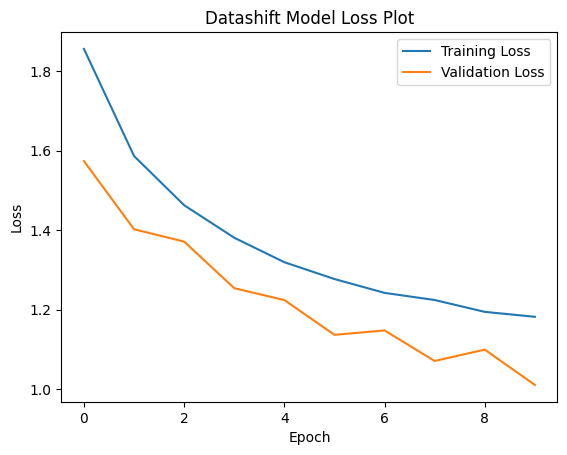

In [ ]:
plt.plot(history_datashift_hp.history['loss'], label='Training Loss')
plt.plot(history_datashift_hp.history['val_loss'], label='Validation Loss')
plt.title('Datashift Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

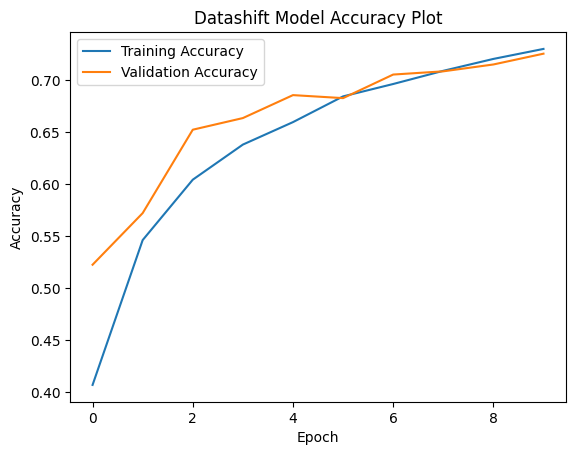

In [ ]:
plt.plot(history_hp.history['accuracy'], label='Training Accuracy')
plt.plot(history_hp.history['val_accuracy'], label='Validation Accuracy')
plt.title('Datashift Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss_hp_datashift, test_accuracy_hp_datashift = hp_datashift_model.evaluate(test_generator)

313/313 [==============================] - 6s 18ms/step - loss: 1.2962 - accuracy: 0.5365


In [ ]:
print(f"Test Loss: {test_loss_hp_datashift}")
print(f"Test Accuracy: {test_accuracy_hp_datashift}")

Test Loss: 1.2961617708206177
Test Accuracy: 0.5364999771118164


In [ ]:
test_loss_hp_datashift2, test_accuracy_hp_datashift2 = hp_datashift_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0443 - accuracy: 0.6291


In [ ]:
print(f"Test Loss: {test_loss_hp_datashift2}")
print(f"Test Accuracy: {test_accuracy_hp_datashift2}")

Test Loss: 1.044337272644043
Test Accuracy: 0.6291000247001648


Accuracy is better for test dataset (with augmented data)